# Pytorch Computer Vision



## 0. Computer Vision Libraries in Pytorch

* [`torchvision`] - base domain library for Pytroch computer vision
* `torchvision.datasets` - get datasets and data loading function for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with a ML model
* `torch.utils.data.Dataset` - Base dataset class for Pytorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
# Import pytorch
import torch
from torch import nn
# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1. Getting a Dataset

The dataset we´ll be using will be the FashionMNIST from `torchvision.datsets`- https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data', #where to download it
    train=True, # do we want the training or testing dataset
    download=True, # Do we want to download it
    transform=ToTensor(), # how de we want to transform the data
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data', #where to download it
    train=False, # do we want the training or testing dataset
    download=True, # Do we want to download it
    transform=ToTensor(), # how de we want to transform the data
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11553758.34it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210587.09it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3831047.31it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14020959.09it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# Check the shape
print(f"Image shape: {image.shape}, Label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]), Label: Ankle boot


## 1.2 Visualizing our Data

Image shape: torch.Size([1, 28, 28])


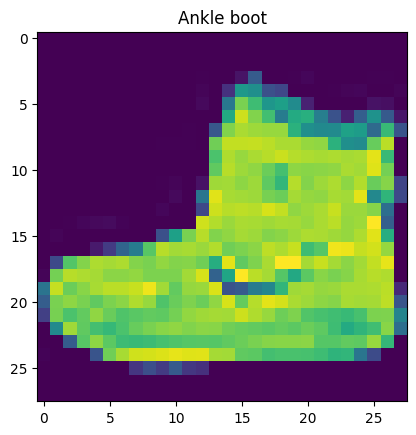

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label]);
# Image

(-0.5, 27.5, 27.5, -0.5)

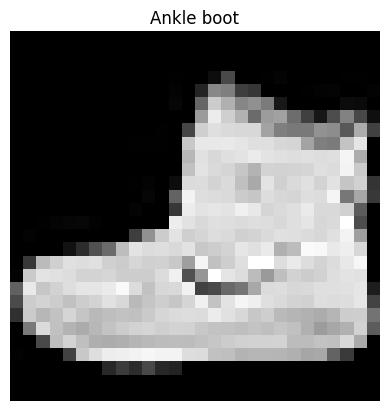

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

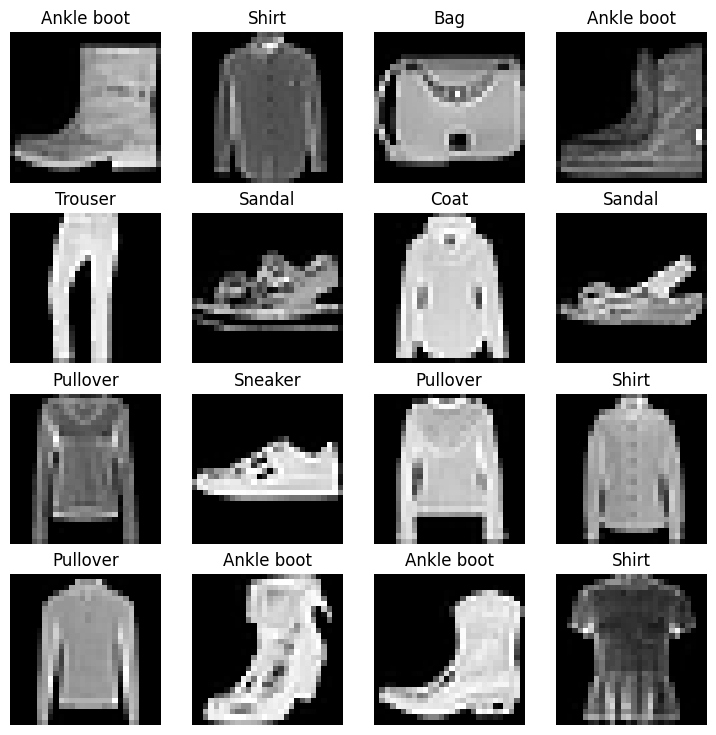

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


Do you think these items could be modeled with pure linear lines? Or do you think we´ll need non-linearities?

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of Pytorch Datasets

A dataloaders turns our dataset into a Pyton iterable.

More specifically, we want to turn our data into batches (or mini-batches). Why?

1. It is more computationally efficient, as in your computer hardware may not be able to store in memory all 60,000 images in one hit. So we break it down to 32 images (commonly).

2. It gives our neural network more chances to update is gradients per epoch.



In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32
# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7de71de4be80>,
 <torch.utils.data.dataloader.DataLoader at 0x7de71e3c99c0>)

In [13]:
# Let´s check out what we´ve created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Len of Train Dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Len of Test Dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7de71de4be80>, <torch.utils.data.dataloader.DataLoader object at 0x7de71e3c99c0>)
Len of Train Dataloader: 1875 batches of 32...
Len of Test Dataloader: 313 batches of 32...


In [14]:
# Check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


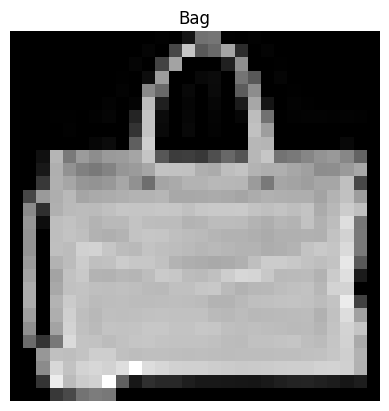

In [15]:
# Show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of ML modeling experiments, it´s best practice to start with a baseline model.train_labels_batch

A baseline model - a simple model to build on top to improve performance

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()

 # Get a single sample
x = train_features_batch[0]
print(f"Before flattening: {x.shape}")

# Flattening the sample
output = flatten_model(x) # perform forward pass

# What happened
print(f"After flattening: {output.shape}")
print(f"Sqeezed flattening: {output.squeeze().shape}")

Before flattening: torch.Size([1, 28, 28])
After flattening: torch.Size([1, 784])
Sqeezed flattening: torch.Size([784])


In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stach = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stach(x)

In [18]:
torch.manual_seed(42)

# Setup model with input params
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units=10,
    output_shape=len(class_names) # one for every class
)

model_0.to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stach): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stach.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stach.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stach.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer, and evaluation metrics

* Loss function: multiclass - `nn.CrossEntropy()`
* Optimizer - our optimizer `torch.optim.SGD()`
* Evaluation metric - since we are wirking on a classification problem, let´s use accuracy (could be using recall, f1score...)

In [21]:
import requests
from pathlib import Path

# Download helper function from learn Pytorch repo
if Path("helper_functions.py").is_file():
  print("Already there, skipping...")
else:
  print("Downloading...")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', "wb") as f:
    f.write(request.content)

Downloading...


In [22]:
# Import accuracy metric from helper functions
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

### 3.2 Create a function to time our experiments

Machine learning is very experimental.

Two of the main things to track are the i) model´s performance (loss and accuracy, etc.) and ii) how fast it runs



In [23]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device= None):
  """
  Prints difference between start and end time
  """
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")

In [24]:
start_timer = timer()
# some code here...
end_time = timer()
print_train_time(start_timer, end_time, device="cpu")

Train time on cpu: 0.000 seconds


### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss **per batch**
3. Loop though testing batches, perform testing steps, calculate the test loss **per batch**
4. Print out what´s happening
5. Time our experiments




In [25]:
# Imort tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set epochs - keep it small for fast training
epochs = 3

# Create a training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---")
  # Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate the loss per batch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimzer step
    optimizer.step()

    if batch % 400 == 0:
      print(f"Have seen at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide the train loss by len of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Forward pass
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  # Print
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

# Time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end= train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
Have seen at 0/60000 samples
Have seen at 12800/60000 samples
Have seen at 25600/60000 samples
Have seen at 38400/60000 samples
Have seen at 51200/60000 samples

Train loss: 0.5904 | Test loss: 0.5095 | Test Acc: 82.0387
Epoch: 1
---
Have seen at 0/60000 samples
Have seen at 12800/60000 samples
Have seen at 25600/60000 samples
Have seen at 38400/60000 samples
Have seen at 51200/60000 samples

Train loss: 0.4763 | Test loss: 0.4799 | Test Acc: 83.1969
Epoch: 2
---
Have seen at 0/60000 samples
Have seen at 12800/60000 samples
Have seen at 25600/60000 samples
Have seen at 38400/60000 samples
Have seen at 51200/60000 samples

Train loss: 0.4550 | Test loss: 0.4766 | Test Acc: 83.4265
Train time on cpu: 36.904 seconds


## 4. Make predictions and get model 0 results

In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """
  Returns a dictionary containing the results of model predicting on data loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make predictions
      y_pred = model(X)
      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find an average per bacth
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model is created with a class}
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code (for using a GPU is there is one)

In [27]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [28]:
# Setup devide agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 6. Model1: Building a better model with non-linearity

We learned about the power of non-linearity in Notebook 02

In [29]:
# Let´s create a model with both linear and non-linear data
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #flatten into a single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [30]:
device

'cpu'

In [31]:
# Create an instance of model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, #28*28
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer, and evaluation metrics


In [32]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

In [33]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """
  Performs a training with model trying to learn on data_loader
  """
  train_loss, train_acc = 0, 0
  model.train()

  for batch, (X, y) in enumerate(data_loader):
    # Put data on device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate the loss per batch
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Optimzer step
    optimizer.step()
  # Divide the train loss and acc by len of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}%")

In [34]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """
  Performs a testing loop step on a model going over data_loader
  """
  test_loss, test_acc = 0,0
  # Put the model in eval mode
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      test_pred = model(X)
      # 2. Calculate the loss
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    # Adjust metrics and print
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%\n")

In [35]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

# Set epochs

epochs = 3

# Create a optimization and evaluation loop using train_set() and test_step()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
Train Loss: 1.09199, Train Acc: 61.34%
Test loss: 0.95636, Test Acc: 65.00%

Epoch: 1
---
Train Loss: 0.78101, Train Acc: 71.93%
Test loss: 0.72227, Test Acc: 73.91%

Epoch: 2
---
Train Loss: 0.67027, Train Acc: 75.94%
Test loss: 0.68500, Test Acc: 75.02%

Train time on cpu: 36.423 seconds


> **Note:** Sometimes your model may train faster on cpu than to gpu.

  1. It could be that the overhead for copying data to the GPU outweights the benefits offered by the GPU.

  2. The hardware you are using has a better CPU in terms compute capability than the GPU.

In [36]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """
  Returns a dictionary containing the results of model predicting on data loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make our data devide agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)
      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find an average per bacth
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model is created with a class}
            "model_loss": loss.item(),
            "model_acc": acc}

In [37]:
# Get model 1 results dict
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [38]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a CNN

1. CNN´s are also ConvNets
2. CNN´s are known for their capabilities to find patterns in visual data

https://poloclub.github.io/cnn-explainer/


In [39]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
  """
  Model arch that replicates the TinyVGG model from CNN explainer
  """
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #Values we can set in CNNS are hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*49, #there is a trick to calculating
                  out_features=output_shape)
    )

  def forward(self, x):
    #print(f"Original shape: {x.shape}")
    x = self.conv_block_1(x)
    #print(f"After 1 conv2d: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"After 2 conv2d: {x.shape}")
    x = self.classifier(x)
    #print(f"After classifier: {x.shape}")
    return x

In [40]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

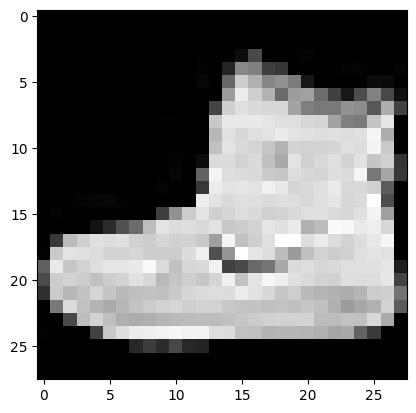

In [41]:
plt.imshow(image.squeeze(), cmap="gray");

In [42]:
# Pass image through model
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d`

In [43]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

images.shape, test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [44]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,#rgb channels
                       out_channels=10, #hidden units
                       kernel_size=3, #3->3,3) refers to the matrix size of the conv
                       stride=1, #jump in kernel size movement
                       padding=0 #pixels in the edge
                      )

# Pass the data thorugh the conv layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping thorugh `nn.MaxPool2d()`

In [45]:
test_image.shape

torch.Size([3, 64, 64])

In [46]:
# Print out original image shape wo unsqueeze dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqeezed dimension: {test_image.unsqueeze(0).shape}")

# Sample maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_though_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Image after conv2d layer: {test_image_though_conv.shape}")
test_image_through_conv_and_maxpool = max_pool_layer(test_image_though_conv)
print(f"Shape after max pool and conv2d layer: {test_image_through_conv_and_maxpool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqeezed dimension: torch.Size([1, 3, 64, 64])
Image after conv2d layer: torch.Size([1, 10, 62, 62])
Shape after max pool and conv2d layer: torch.Size([1, 10, 31, 31])


In [47]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)

max_pool_tensor.shape

torch.Size([1, 1, 1, 1])

### 7.3 Setup a loss function and optimizer for model 2


In [48]:
# Loss function
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2`using our training and testing funcs

In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---")
  train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn,
             optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)

  test_step(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn,
            accuracy_fn=accuracy_fn, device=device)

train_time_end_model_2 = timer()
toral_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
Train Loss: 0.59518, Train Acc: 78.38%
Test loss: 0.39500, Test Acc: 85.99%

Epoch: 1
---
Train Loss: 0.36536, Train Acc: 86.90%
Test loss: 0.35244, Test Acc: 86.91%

Epoch: 2
---
Train Loss: 0.32588, Train Acc: 88.13%
Test loss: 0.32719, Test Acc: 88.07%

Train time on cpu: 176.145 seconds


In [50]:
# Get results dict
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [51]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [52]:
## 8. Comparing model results and training time
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


Text(0, 0.5, 'Model')

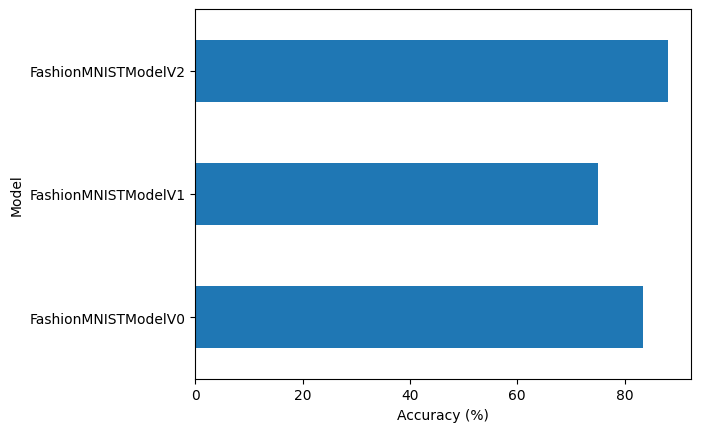

In [53]:
# Visualize
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

In [54]:
## 9. Make and evaluate random predicitons with best model
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())


  # Stack the pred_probs to turn lists into a tensor
  return torch.stack(pred_probs)

In [68]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

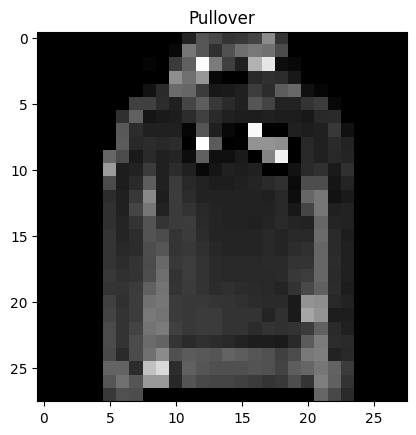

In [69]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]]);

In [70]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[4.9888e-02, 1.8706e-03, 5.7892e-01, 9.2597e-03, 1.9227e-01, 9.2515e-05,
         1.4721e-01, 1.8579e-04, 2.0143e-02, 1.5928e-04],
        [4.4751e-04, 5.4043e-05, 6.0747e-02, 4.6409e-04, 9.3198e-01, 6.9176e-07,
         3.2903e-03, 7.9197e-06, 2.9982e-03, 8.0210e-06]])

In [71]:
# Covert prediction probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 4, 6, 3, 2, 2, 0, 1, 1])

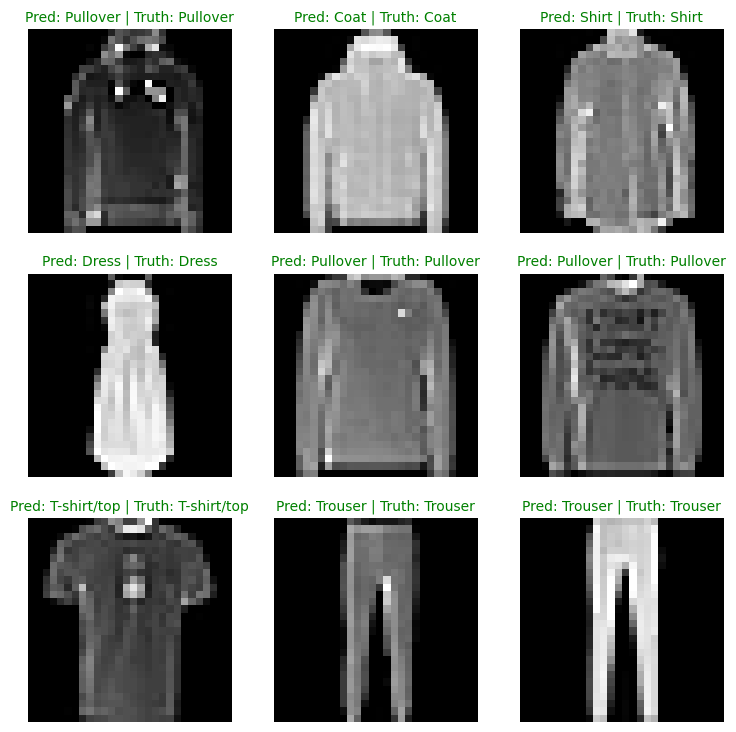

In [72]:
# PLot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
     plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);


## 10. Making a confusion matrix to evaluate our classification model

A confusion metric is a great way to evaluate classification models

1. Make predictions on the test dataset
2. Make a confusion matrix `torchmetrics.Confusion`
3. PLot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [76]:
# Import tqdm.auto
from tqdm.auto import tqdm

# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

  # Concatenate list of predictions into a tensor
  #print(y_preds)
  y_pred_tensor = torch.cat(y_preds)
  y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [77]:
len(y_pred_tensor)

10000

In [83]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split('.')[1])>= 19, "mlxtend should be 0.19 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [84]:
import mlxtend
print(mlxtend.__version__)

0.22.0


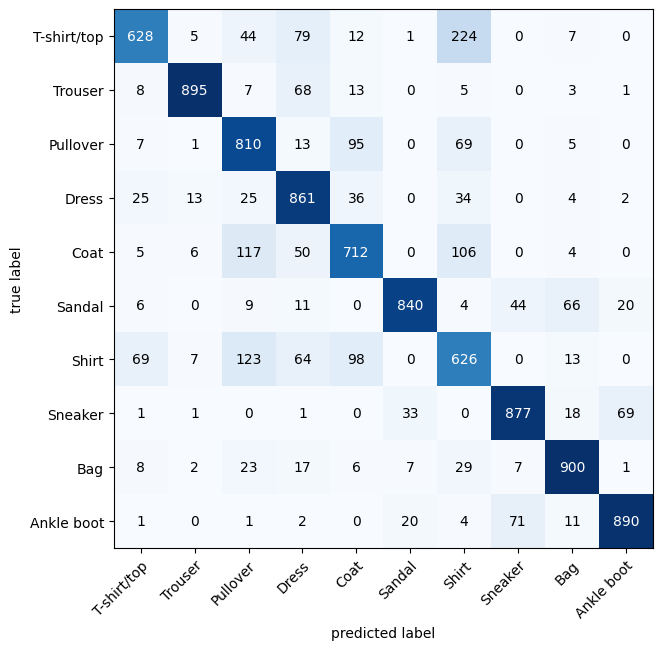

In [86]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# PLotting the confmat
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10, 7)
)

## 11. Saving and loading a model

In [89]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH = Path(parents=True, exist_ok=True)
MODEL_NAME = "03_Pytorch_CV_Model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model t: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model t: 03_Pytorch_CV_Model_2.pth


In [90]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))


loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [92]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [93]:
# Evaluate  loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [94]:
import pandas as pd
compare_results = pd.DataFrame([model_2_results,
                                loaded_model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV2,0.32719,88.069089
1,FashionMNISTModelV2,0.32719,88.069089
